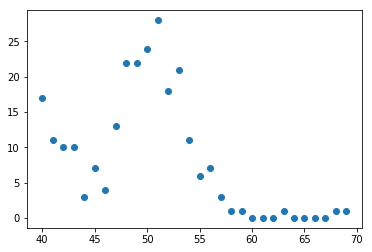

In [139]:
import numpy as np
import pandas as pd
import scipy.optimize as optimization
import matplotlib.pyplot as plt

filename = '../data/90_977.txt'

channel = np.linspace(0,255, num=256)
values = np.loadtxt(filename)
plotFrom = 40
plotTo = 70
plt.scatter(channel[plotFrom:plotTo], values[plotFrom:plotTo])

[ 5.09164152e+01  1.66835409e+00  9.95237479e+01  4.76765927e+03
 -1.48855541e-01] [3.78576973e-01 2.68497723e-01 1.78986211e+01 6.67140889e+03
 3.64611656e-02]


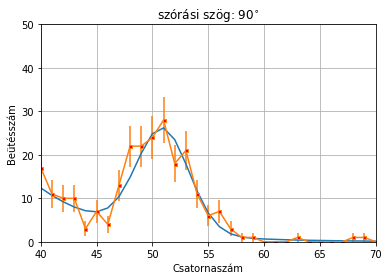

In [140]:
error = np.sqrt(values)

startVal = 35
endVal = 59

def gauss(x, m, s, A, bA, bb):
    return A/(np.sqrt(2*np.pi)*s)*np.exp(-((x-m)/(2*s))**2) + bA*np.exp(bb*x)

x0 = np.array([53.,4., 190., 20., -.008])

params, cov = optimization.curve_fit(gauss, channel[startVal:endVal], values[startVal:endVal],
                                     x0, error[startVal:endVal])
perr = np.sqrt(np.diag(cov))

plt.plot(channel, gauss(channel, *params))
plt.errorbar(channel, values, error, marker='s', mfc='red', ms=3)
plt.xlim(plotFrom,plotTo)
plt.ylim(0,50)
plt.title('szórási szög: 90$^{\circ}$')
plt.xlabel('Csatornaszám')
plt.ylabel('Beütésszám')
plt.grid(True)
plt.savefig('../plots/withbackground/90_977fit.png')

print(params, perr)

In [141]:
np.savetxt('../gaussfits/withbackground/90_977fit.dat', (params, perr))